In [1]:
import pandas as pd
import torch
from torch_geometric.data import Data

# Load the pickle file
final_df = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northseahourly.pkl")

In [254]:
from torch_geometric.utils import to_networkx
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt

def r2_score(y_true, y_pred):
    y_mean = torch.mean(y_true)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - y_mean) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

class GNNRegression(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(GNNRegression, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x.view(-1)  # Ensure output shape is (num_nodes, )

def train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs):
    # Instantiate the model, optimizer, and loss function
    model = GNNRegression(num_features=num_features, hidden_channels=hidden_channels)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.MSELoss()

    # Convert edge_index to a 2D tensor with two rows (source and target nodes)
    edge_index = torch.tensor([[0, 1], [1, 0]])  # Adjust based on your edge_index

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item()}')

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(data.x, data.edge_index)
        mse = torch.nn.functional.mse_loss(predictions, data.y)
        r2 = r2_score(data.y, predictions)
        print(f'Mean Squared Error on Test Set: {mse.item()}')
        print(f'R-squared Score on Test Set: {r2.item()}')

    # Plot true vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(data.y.numpy(), predictions.numpy(), color='blue')
    plt.plot(data.y.numpy(), data.y.numpy(), color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.grid(True)
    plt.show()

# Select nodes and features
Each dtation will be represented as a single node in the graph, with temporal information incorporated into the node features rather than creating separate nodes for each time step.

In [174]:
max_q_sea_level_indices = final_df.groupby('stations')['q_sea_level'].idxmax()

# Step 2: Select corresponding rows from the original DataFrame
max_q_sea_level_rows = final_df.loc[max_q_sea_level_indices]

# You can use these selected rows as your node features
node_features = max_q_sea_level_rows[['q_sea_level', 'u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']].values

## Spatial clustering

Data(x=[25, 17], edge_index=[250, 2])
Number of nodes: 25
Number of edges: 2
Average node degree: 0.08


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


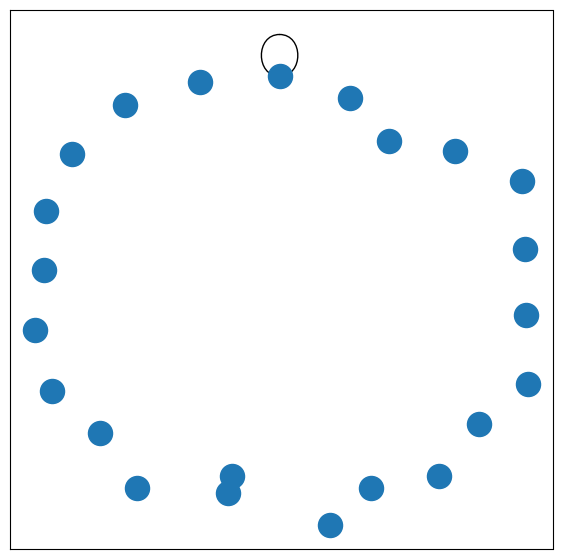

Epoch: 0, Loss: 48871884.0
Epoch: 10, Loss: 6699325.5
Epoch: 20, Loss: 2817034.5
Epoch: 30, Loss: 1106000.5
Epoch: 40, Loss: 407287.375
Epoch: 50, Loss: 138112.421875
Epoch: 60, Loss: 35589.63671875
Epoch: 70, Loss: 3776.189453125
Epoch: 80, Loss: 255.15574645996094
Epoch: 90, Loss: 1691.448486328125
Epoch: 100, Loss: 935.2951049804688
Epoch: 110, Loss: 84.5497055053711
Epoch: 120, Loss: 82.88832092285156
Epoch: 130, Loss: 73.90786743164062
Epoch: 140, Loss: 33.710968017578125
Epoch: 150, Loss: 38.0341911315918
Epoch: 160, Loss: 32.49323272705078
Epoch: 170, Loss: 32.0245246887207
Epoch: 180, Loss: 30.7653865814209
Epoch: 190, Loss: 30.054330825805664
Epoch: 200, Loss: 29.237136840820312
Epoch: 210, Loss: 28.506507873535156
Epoch: 220, Loss: 27.77130699157715
Epoch: 230, Loss: 27.051958084106445
Epoch: 240, Loss: 26.340621948242188
Epoch: 250, Loss: 25.642770767211914
Epoch: 260, Loss: 24.95000457763672
Epoch: 270, Loss: 24.27605438232422
Epoch: 280, Loss: 23.613388061523438
Epoch: 290

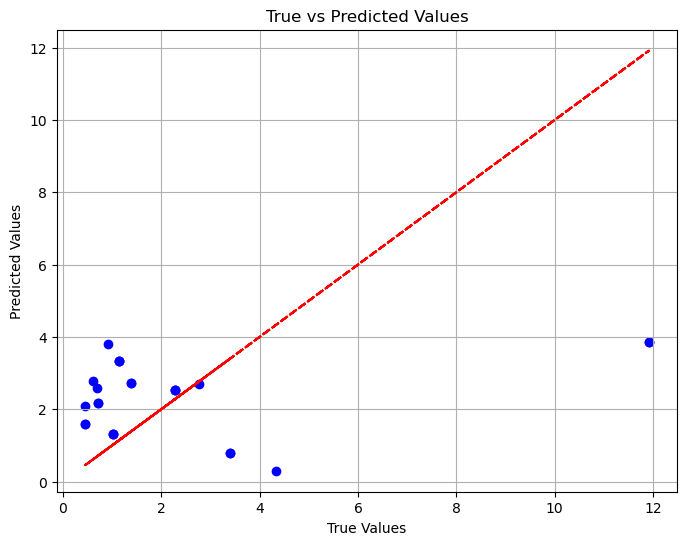

In [249]:
from sklearn.neighbors import kneighbors_graph
# Step 2: Select spatial information for each station
spatial_info = max_q_sea_level_rows[['latitude', 'longitude']].values

#  Compute connectivity matrix based on spatial proximity
k = 10  # Number of nearest neighbors to connect
connectivity_matrix = kneighbors_graph(spatial_info, n_neighbors=k, mode='connectivity', include_self=False)

# Convert connectivity matrix to edge_index format
edge_index = torch.tensor(connectivity_matrix.nonzero(), dtype=torch.long).t().contiguous()


# Step 3: Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
#x = torch.tensor(node_features[:, 1:], dtype=torch.float)  # Exclude sea level height
y = torch.tensor(node_features[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Construct the PyTorch Geometric Data object
#data = Data(x=x, y=y, edge_index=edge_index)

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
#print(f'Number of training nodes: {data.train_mask.sum()}')
#print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
#print(f'Has isolated nodes: {data.has_isolated_nodes()}')
#print(f'Has self-loops: {data.has_self_loops()}')
#print(f'Is undirected: {data.is_undirected()}')


# Convert edge_index to a 2D tensor with two rows (source and target nodes)
edge_index = torch.stack((edge_index[0], edge_index[1]), dim=0)

# Convert to NetworkX graph
G = to_networkx(Data(edge_index=edge_index), to_undirected=True)

# Visualize the graph
visualize_graph(G, color=data.y)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 64*4
lr = 0.001
num_epochs = 1000

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)

## Based on feature simularity

In [214]:
# You can use these selected rows as your node features
node_features_feature = final_df[['q_sea_level', 'u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']].values

In [264]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNRegression(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, dropout_rate=0.5):
        super(GNNRegression, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.dropout = torch.nn.Dropout(dropout_rate)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)
        x = self.fc(x)
        return x.view(-1)  # Ensure output shape is (num_nodes, )


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


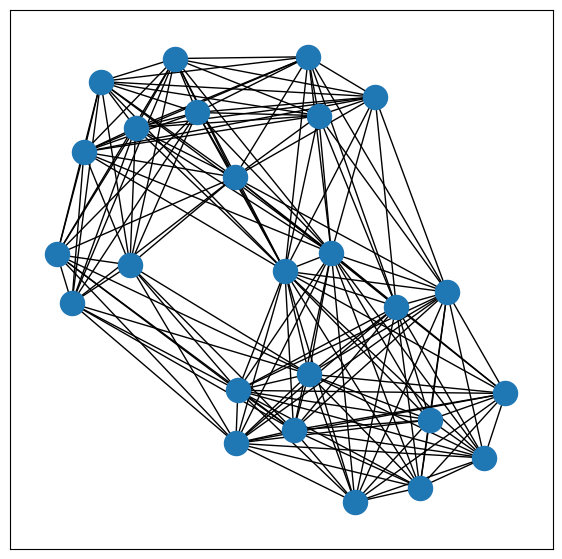

Epoch: 0, Loss: 7217545.5
Epoch: 10, Loss: 15777297.0
Epoch: 20, Loss: 1144214.0
Epoch: 30, Loss: 2980448.0
Epoch: 40, Loss: 1496123.375
Epoch: 50, Loss: 1441375.0
Epoch: 60, Loss: 816520.25
Epoch: 70, Loss: 343314.46875
Epoch: 80, Loss: 331158.375
Epoch: 90, Loss: 439328.53125
Epoch: 100, Loss: 180379.265625
Epoch: 110, Loss: 142607.40625
Epoch: 120, Loss: 63502.57421875
Epoch: 130, Loss: 116264.8125
Epoch: 140, Loss: 86838.28125
Epoch: 150, Loss: 85920.2734375
Epoch: 160, Loss: 93350.5625
Epoch: 170, Loss: 50104.6015625
Epoch: 180, Loss: 91770.3515625
Epoch: 190, Loss: 30253.251953125
Epoch: 200, Loss: 49365.73828125
Epoch: 210, Loss: 35483.109375
Epoch: 220, Loss: 32244.51953125
Epoch: 230, Loss: 30205.259765625
Epoch: 240, Loss: 31514.865234375
Epoch: 250, Loss: 15587.87109375
Epoch: 260, Loss: 17483.587890625
Epoch: 270, Loss: 26271.435546875
Epoch: 280, Loss: 14296.619140625
Epoch: 290, Loss: 12053.0537109375
Epoch: 300, Loss: 15353.2197265625
Epoch: 310, Loss: 6432.9287109375
Ep

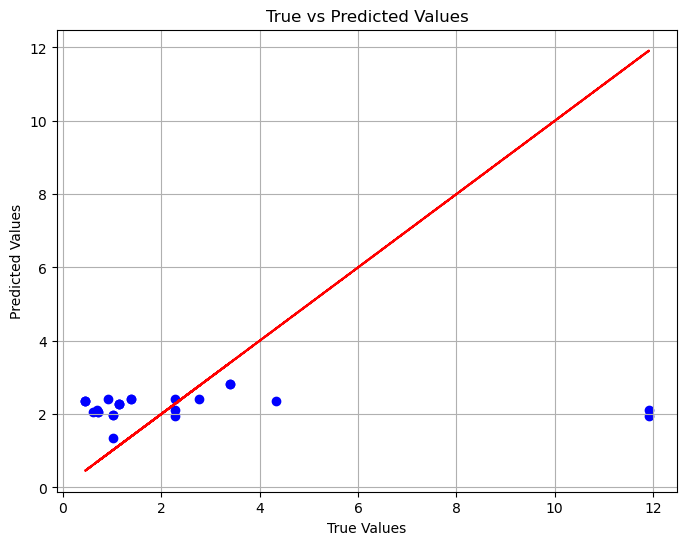

In [265]:
from sklearn.neighbors import kneighbors_graph

# Adjust the parameters of kneighbors_graph to control the number of edges
k = 12  # Number of nearest neighbors to connect
include_self = False  # Exclude self-connections

# Step 2: Select spatial information for each station
spatial_info = max_q_sea_level_rows[['latitude', 'longitude']].values

# Compute connectivity matrix based on spatial proximity
connectivity_matrix = kneighbors_graph(spatial_info, n_neighbors=k, mode='connectivity', include_self=include_self)

# Convert connectivity matrix to edge_index format
edge_index = torch.tensor(connectivity_matrix.nonzero(), dtype=torch.long)

# Ensure edge_index is properly formatted
edge_index = edge_index.contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Convert to NetworkX graph
G = to_networkx(Data(edge_index=edge_index), to_undirected=True)

# Visualize the graph
visualize_graph(G, color=data.y)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 64*10
lr = 0.001
num_epochs = 1000

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)

## Feature similarities now

In [266]:
# You can use these selected rows as your node features
node_features_feature = final_df[['q_sea_level', 'u10', 'v10',
       'mdts', 'mpts', 'mwd', 'mwp', 'sst', 'shts', 'shww', 'sp',
       'tide', 'HAT', 'LAT', 'MHHW', 'MLLW', 'MSL', 'TR']].values

In [ ]:
node_features_feature.corr()

/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXa

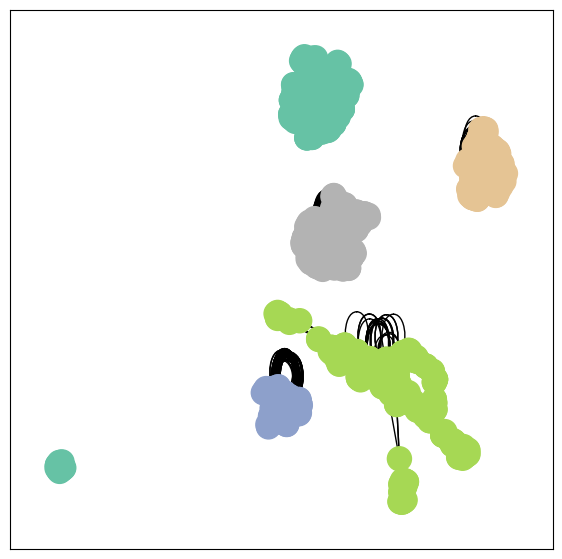

Epoch: 0, Loss: 4393388.0
Epoch: 10, Loss: 7461607.5
Epoch: 20, Loss: 2107532.75
Epoch: 30, Loss: 778346.4375
Epoch: 40, Loss: 515006.78125
Epoch: 50, Loss: 338512.3125
Epoch: 60, Loss: 270819.53125
Epoch: 70, Loss: 166608.796875
Epoch: 80, Loss: 121836.375
Epoch: 90, Loss: 84237.4453125
Mean Squared Error on Test Set: 34.24337387084961
R-squared Score on Test Set: -12.75830078125


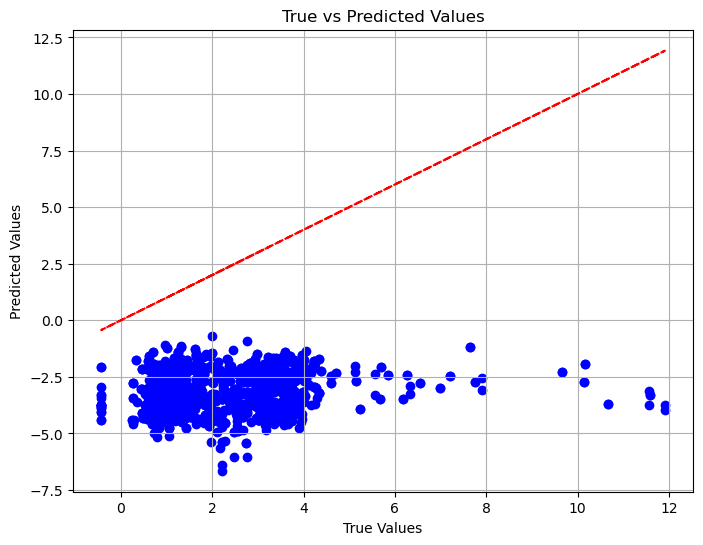

In [287]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import kneighbors_graph

# Step 1: Cluster based on similarities of features
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(node_features_feature[:, 1:])
cluster_labels = kmeans.labels_

# Step 2: Compute pairwise distances within each cluster
distances_within_clusters = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    cluster_features = node_features_feature[cluster_indices, 1:]
    distances_within_cluster = euclidean_distances(cluster_features)
    distances_within_clusters.append(distances_within_cluster)

# Step 3: Compute connectivity matrix based on cluster labels and distances
connectivity_matrices = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    if len(cluster_indices) == 0:
        continue  # Skip empty clusters
    
    cluster_connectivity_matrix = kneighbors_graph(distances_within_clusters[i], n_neighbors=k, mode='connectivity')

    # Ensure that cluster indices are within the valid range
    cluster_indices = cluster_indices[cluster_indices < cluster_connectivity_matrix.shape[0]]

    for j in range(len(cluster_indices)):
        # Ensure that the target indices are within the valid range
        target_indices = cluster_indices[cluster_indices < cluster_connectivity_matrix.shape[0]]
        cluster_connectivity_matrix[cluster_indices[j], target_indices] = True

    connectivity_matrices.append(cluster_connectivity_matrix)


# Step 4: Combine connectivity matrices into a single matrix
combined_connectivity_matrix = np.zeros((len(cluster_labels), len(cluster_labels)))
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    combined_connectivity_matrix[cluster_indices[:, None], cluster_indices] = connectivity_matrices[i].toarray()


# Step 5: Convert connectivity matrix to edge_index format
edge_index = torch.tensor(combined_connectivity_matrix.nonzero(), dtype=torch.long)

# Ensure edge_index is properly formatted
edge_index = edge_index.t().contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index.t())

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 128*3
lr = 0.001
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index.t(), y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


In [298]:
data

Data(x=[1263, 18], edge_index=[2, 1596])

Data(x=[1263, 17], edge_index=[2, 796953], y=[1263])


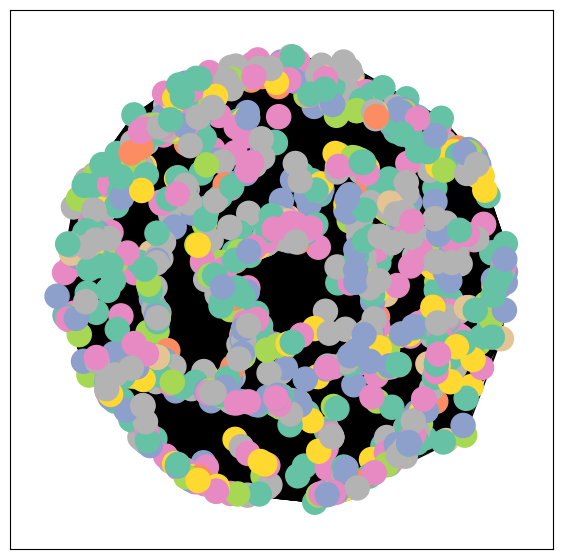

In [318]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Compute pairwise distances between features
distances = euclidean_distances(node_features_feature)

# Step 2: Define a threshold to determine similarity
threshold = 0.01 # Adjust as needed

# Step 3: Create edge index based on distances and threshold
edge_index = []
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        if distances[i, j] < threshold:
            edge_index.append([i, j])


from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity
cosine_sim = cosine_similarity(node_features_feature)

# Define threshold for similarity
threshold = 0.999

# Create edge index based on cosine similarity and threshold
edge_index = []
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim)):
        if cosine_sim[i, j] > threshold:
            edge_index.append([i, j])

# Convert edge_index to torch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),
            edge_index=edge_index, y = y)

print(data)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)



Epoch: 0, Loss: 2203993856.0
Epoch: 10, Loss: 63304888.0
Epoch: 20, Loss: 76384.71875
Epoch: 30, Loss: 3361.1923828125
Epoch: 40, Loss: 7156.5556640625
Epoch: 50, Loss: 1810.846435546875
Epoch: 60, Loss: 5277.7998046875
Epoch: 70, Loss: 2015.5311279296875
Epoch: 80, Loss: 253.51309204101562
Epoch: 90, Loss: 135.84048461914062
Mean Squared Error on Test Set: 8.846779823303223
R-squared Score on Test Set: -2.5544586181640625


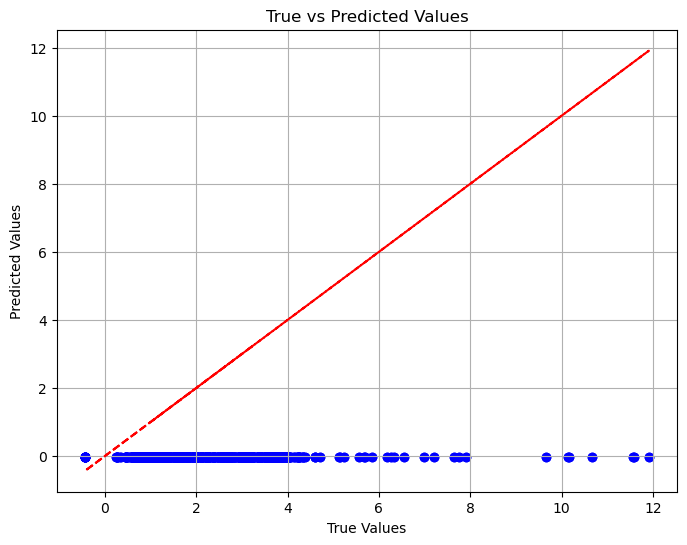

In [319]:
# Set hyperparameters
num_features = data.num_node_features
hidden_channels = 64
lr = 0.01
num_epochs = 100

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)

Number of clusters: 16
Cluster labels: [-1 -1 -1 ... -1 -1 -1]
tensor([[102, 102, 102,  ..., 813, 813, 814],
        [103, 104, 105,  ..., 814, 815, 815]])
Data(x=[1263, 17], edge_index=[2, 1056], y=[1263])


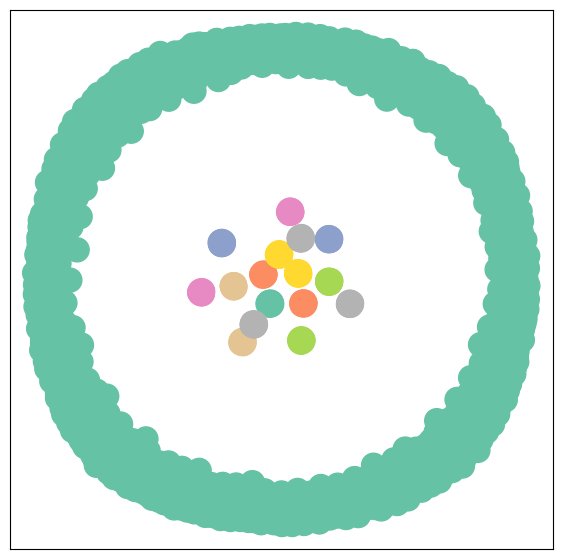

Epoch: 0, Loss: 55538652.0
Epoch: 10, Loss: 16953014.0
Epoch: 20, Loss: 10174185.0
Epoch: 30, Loss: 6664062.5
Epoch: 40, Loss: 4235722.0
Epoch: 50, Loss: 3075108.5
Epoch: 60, Loss: 2185632.0
Epoch: 70, Loss: 1631326.125
Epoch: 80, Loss: 1401842.875
Epoch: 90, Loss: 1245772.875
Mean Squared Error on Test Set: 12167.9736328125
R-squared Score on Test Set: -4887.84765625


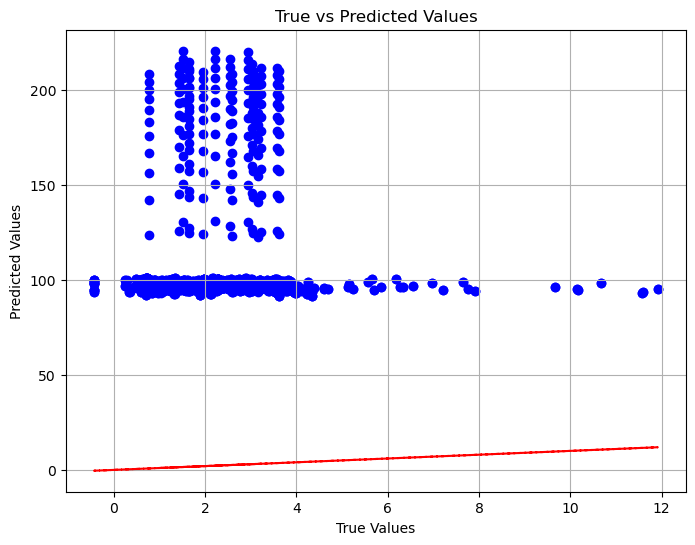

In [334]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with appropriate parameters
eps = 0.3 # Adjust as needed
min_samples = 10  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
cluster_labels = dbscan.fit_predict(node_features_feature[:, 1:])  # Exclude the target variable

# Extract the core samples and their indices
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Get the number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Print the number of clusters and cluster labels
print("Number of clusters:", num_clusters)
print("Cluster labels:", cluster_labels)

import numpy as np
import torch

# Initialize an empty list to store edges
edge_index = []

# Iterate over each cluster label
for cluster_label in range(num_clusters):
    # Get indices of nodes belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    
    # Create edges between all pairs of nodes within the cluster
    for i in range(len(cluster_indices)):
        for j in range(i + 1, len(cluster_indices)):
            # Add an edge between nodes i and j within the cluster
            edge_index.append([cluster_indices[i], cluster_indices[j]])

# Convert edge_index to a torch tensor and ensure it's properly formatted
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()


# Print the edge_index
print(edge_index)

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),
            edge_index=edge_index, y = y)

print(data)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)

# Set hyperparameters
num_features = data.num_node_features
hidden_channels = 128
lr = 0.001
num_epochs = 100

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


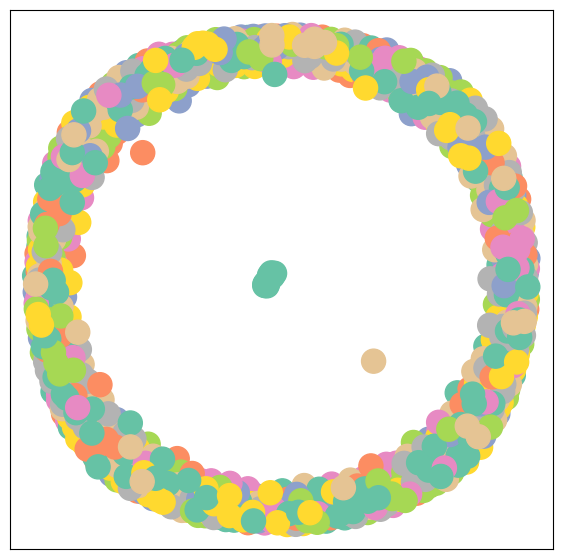

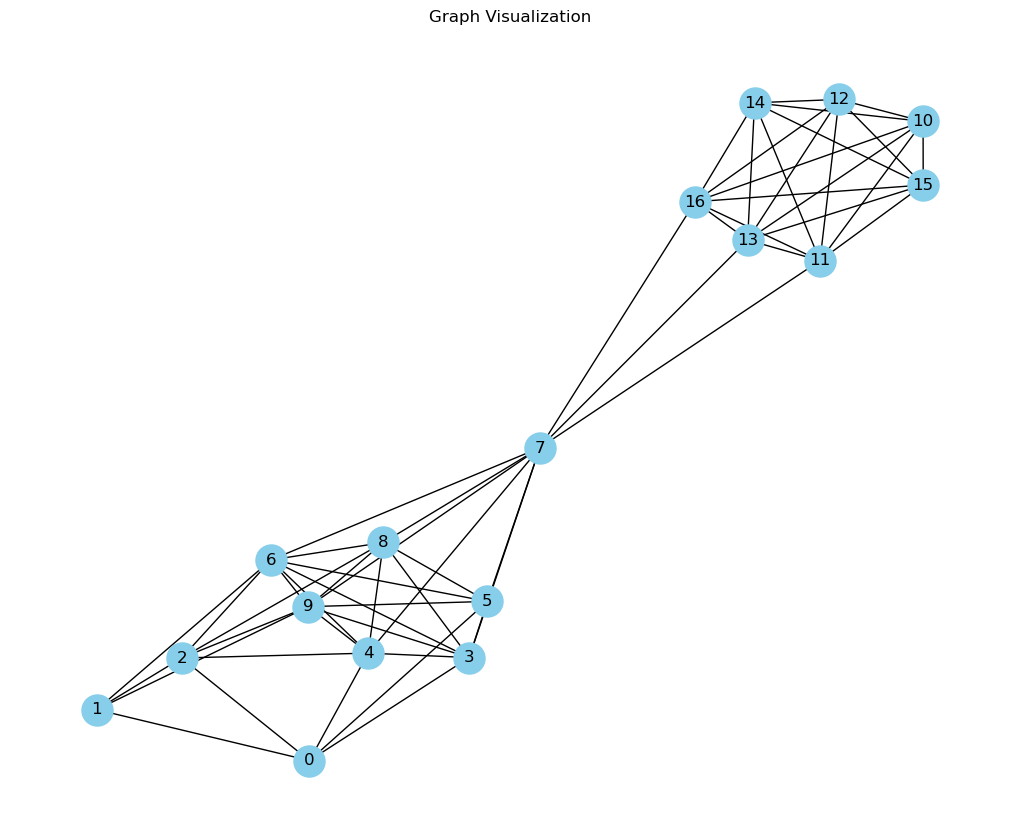

Epoch: 0, Loss: 27390626.0
Epoch: 10, Loss: 9762785.0
Epoch: 20, Loss: 3913850.5
Epoch: 30, Loss: 2080708.875
Epoch: 40, Loss: 1151066.75
Epoch: 50, Loss: 750001.25
Epoch: 60, Loss: 495390.0
Epoch: 70, Loss: 417524.09375
Epoch: 80, Loss: 291544.03125
Epoch: 90, Loss: 230040.5
Mean Squared Error on Test Set: 876.5277099609375
R-squared Score on Test Set: -351.1712341308594


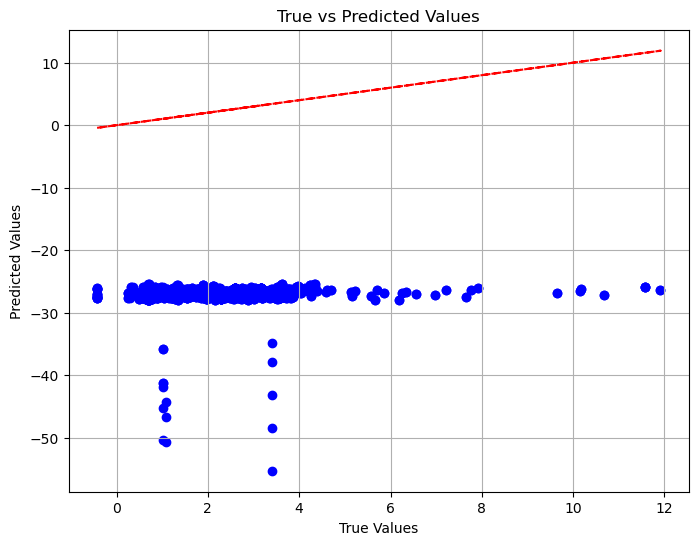

In [366]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import numpy as np

# Compute pairwise correlations between features
correlation_matrix = np.corrcoef(node_features_feature[:, 1:], rowvar=False)

# Define a threshold for correlation to determine connections
threshold = 0.1  # Adjust as needed

# Create edge_index based on correlations and threshold
edge_index = []
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        if abs(correlation_matrix[i, j]) > threshold:
            edge_index.append([i, j])

# Convert edge_index to torch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),
            edge_index=edge_index)

# Convert to NetworkX graph for visualization
G = to_networkx(data, to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)


import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph from the edge_index
G = nx.Graph()
G.add_edges_from(edge_index.t().tolist())

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='black')
plt.title('Graph Visualization')
plt.show()


# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),
            edge_index=edge_index, y = y)

# Set hyperparameters
num_features = data.num_node_features
hidden_channels = 128*1
lr = 0.001
num_epochs = 100

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


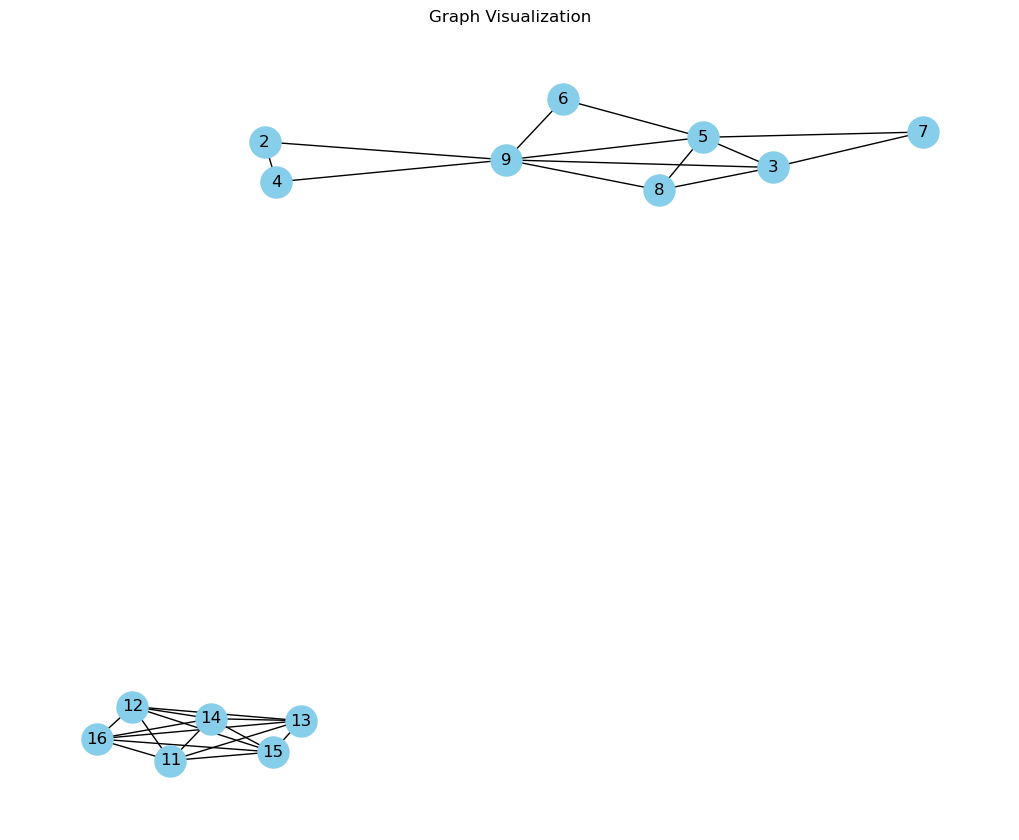

In [357]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph from the edge_index
G = nx.Graph()
G.add_edges_from(edge_index.t().tolist())

# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='black')
plt.title('Graph Visualization')
plt.show()


In [293]:
from sklearn.metrics.pairwise import euclidean_distances
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

from sklearn.neighbors import kneighbors_graph

# Set the number of nearest neighbors (k) for connectivity
k = 5  # Adjust as needed

# Create connectivity matrix using k-nearest neighbors algorithm
connectivity_matrix = kneighbors_graph(node_features_feature[:, 1:], n_neighbors=k, mode='connectivity')

# Convert connectivity matrix to edge_index format
edge_index = torch.tensor(connectivity_matrix.nonzero(), dtype=torch.long)

# Ensure edge_index is properly formatted
edge_index = edge_index.t().contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)


# Visualize the graph
visualize_graph(G, color=cluster_labels)

# Set hyperparameters
num_features = data.num_node_features
hidden_channels = 32
lr = 0.01
num_epochs = 100

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


ValueError: too many values to unpack (expected 2)

In [284]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import kneighbors_graph
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Cluster based on similarities of features
num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(node_features_feature[:, 1:])
cluster_labels = kmeans.labels_

# Step 2: Compute pairwise distances within each cluster
distances_within_clusters = []
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    cluster_features = node_features_feature[cluster_indices, 1:]
    distances_within_cluster = euclidean_distances(cluster_features)
    distances_within_clusters.append(distances_within_cluster)

# Step 3: Compute pairwise distances between cluster centroids
cluster_centroids = kmeans.cluster_centers_
distances_between_clusters = euclidean_distances(cluster_centroids)

# Step 4: Determine connections between clusters
threshold = 10  # Adjust the threshold value as needed
connectivity_matrix = np.zeros((num_clusters, num_clusters))
for i in range(num_clusters):
    for j in range(num_clusters):
        if i != j:
            # Establish connections between clusters if they are close enough
            if distances_between_clusters[i, j] < threshold:
                connectivity_matrix[i, j] = 1


# Step 5: Convert cluster connections to edge_index format
edge_index = torch.tensor(np.transpose(np.where(connectivity_matrix == 1)), dtype=torch.long)

# Ensure edge_index is properly formatted
edge_index = edge_index.t().contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index.t())

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 32
lr = 0.01
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index.t(), y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IndexError: index 0 is out of bounds for dimension 0 with size 0

/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


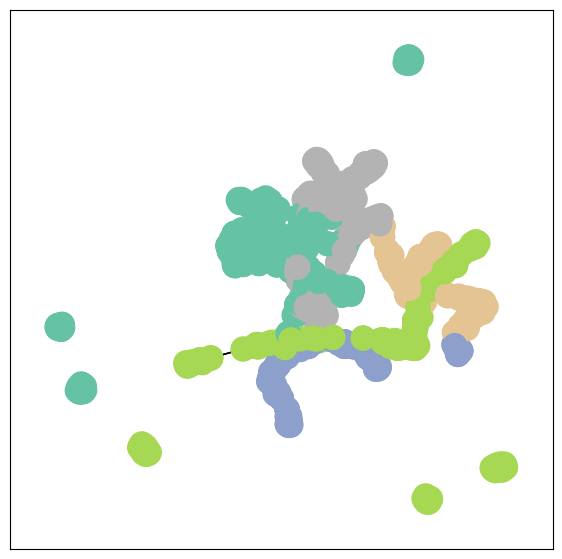

Epoch: 0, Loss: 138936656.0
Epoch: 10, Loss: 4830983.0
Epoch: 20, Loss: 118071.71875
Epoch: 30, Loss: 54539.69921875
Epoch: 40, Loss: 32747.04296875
Epoch: 50, Loss: 16182.5830078125
Epoch: 60, Loss: 24281.517578125
Epoch: 70, Loss: 13926.734375
Epoch: 80, Loss: 5798.01513671875
Epoch: 90, Loss: 14435.8681640625
Mean Squared Error on Test Set: 244.35931396484375
R-squared Score on Test Set: -97.17866516113281


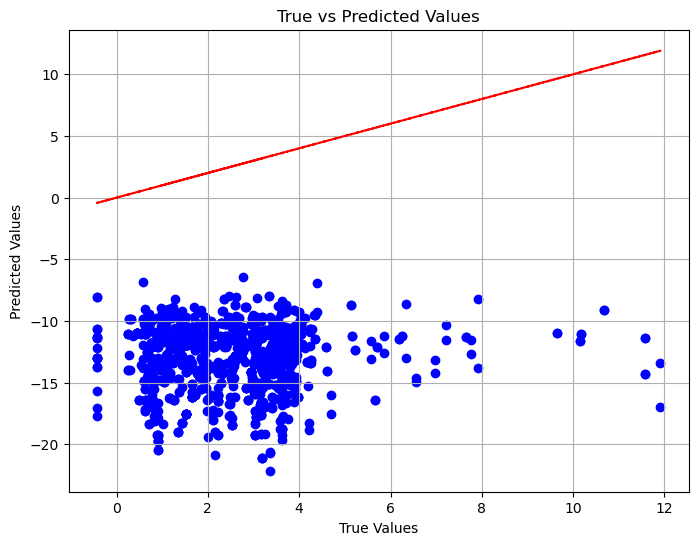

In [271]:
from sklearn.cluster import KMeans

# Step 2: Cluster based on similarities of features
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(node_features_feature[:, 1:])

# Assign cluster labels to each station
cluster_labels = kmeans.labels_

# Compute connectivity matrix based on cluster labels
connectivity_matrix = kneighbors_graph(node_features_feature[:, 1:], n_neighbors=k, mode='connectivity', include_self=include_self)

# Convert connectivity matrix to edge_index format
edge_index = torch.tensor(connectivity_matrix.nonzero(), dtype=torch.long)

# Ensure edge_index is properly formatted
edge_index = edge_index.contiguous()

# Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features_feature[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
y = torch.tensor(node_features_feature[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Convert to NetworkX graph
G = to_networkx(Data(edge_index=edge_index), to_undirected=True)

# Visualize the graph
visualize_graph(G, color=cluster_labels)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 32
lr = 0.01
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)


In [211]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 2: Select features for similarity computation
features_for_similarity = final_df[['q_sea_level', 'u10', 'v10']].values

# Compute similarity matrix based on cosine similarity
similarity_matrix = cosine_similarity(features_for_similarity)

# Set a threshold to create edges between stations with high similarity
threshold = 0.999 # Adjust as needed

# Create adjacency matrix based on similarity threshold
adjacency_matrix = (similarity_matrix > threshold).astype(int)

# Convert adjacency matrix to edge_index format
edge_index = torch.tensor(np.array(np.where(adjacency_matrix == 1)), dtype=torch.long)

# Step 3: Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
#x = torch.tensor(node_features[:, 1:], dtype=torch.float)  # Exclude sea level height
y = torch.tensor(node_features[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Construct the PyTorch Geometric Data object
#data = Data(x=x, y=y, edge_index=edge_index)

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
#print(f'Number of training nodes: {data.train_mask.sum()}')
#print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
#print(f'Has isolated nodes: {data.has_isolated_nodes()}')
#print(f'Has self-loops: {data.has_self_loops()}')
#print(f'Is undirected: {data.is_undirected()}')


# Convert edge_index to a 2D tensor with two rows (source and target nodes)
edge_index = torch.stack((edge_index[0], edge_index[1]), dim=0)
edge_index = torch.tensor(np.transpose(np.where(adjacency_matrix == 1)), dtype=torch.long)


# Convert to NetworkX graph
G = to_networkx(Data(edge_index=edge_index), to_undirected=True)

# Visualize the graph
visualize_graph(G, color=data.y)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 64
lr = 0.001
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)

Data(x=[25, 17], edge_index=[2, 10397])
Number of nodes: 25
Number of edges: 10397
Average node degree: 415.88


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


ValueError: too many values to unpack (expected 2)

Maurits Houck


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Data(x=[25, 17], edge_index=[2, 501594])
Number of nodes: 25
Number of edges: 501594
Average node degree: 20063.76


/Users/lb962/miniconda3/envs/ESL/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


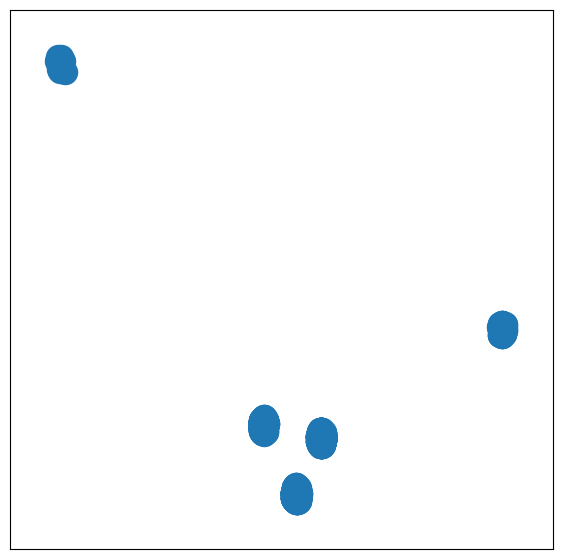

RuntimeError: index 25 is out of bounds for dimension 0 with size 25

In [209]:
from sklearn.cluster import KMeans

# Step 2: Select features for clustering
features_for_clustering = final_df[['q_sea_level']].values

# Determine the number of clusters (adjust as needed)
n_clusters = 5

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(features_for_clustering)

# Initialize an empty adjacency matrix
adjacency_matrix = np.zeros((len(final_df), len(final_df)))

# Iterate over each cluster
for cluster_id in range(n_clusters):
    # Get indices of stations in the current cluster
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    
    # Connect stations within the cluster
    for i in range(len(cluster_indices)):
        for j in range(i + 1, len(cluster_indices)):
            station_i_index = cluster_indices[i]
            station_j_index = cluster_indices[j]
            adjacency_matrix[station_i_index, station_j_index] = 1
            adjacency_matrix[station_j_index, station_i_index] = 1

# Convert adjacency matrix to edge_index format
edge_index = torch.tensor(np.array(np.where(adjacency_matrix == 1)), dtype=torch.long)

# Step 3: Construct the PyTorch Geometric Data object
data = Data(x=torch.tensor(node_features[:, 1:], dtype=torch.float),  # Exclude sea level height
            edge_index=edge_index)

# Assuming node_features contains both features and the target variable
#x = torch.tensor(node_features[:, 1:], dtype=torch.float)  # Exclude sea level height
y = torch.tensor(node_features[:, 0], dtype=torch.float)  # Assuming sea level height is the first column

# Construct the PyTorch Geometric Data object
#data = Data(x=x, y=y, edge_index=edge_index)

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
#print(f'Number of training nodes: {data.train_mask.sum()}')
#print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
#print(f'Has isolated nodes: {data.has_isolated_nodes()}')
#print(f'Has self-loops: {data.has_self_loops()}')
#print(f'Is undirected: {data.is_undirected()}')


# Convert edge_index to a 2D tensor with two rows (source and target nodes)
edge_index = torch.stack((edge_index[0], edge_index[1]), dim=0)

# Convert to NetworkX graph
G = to_networkx(Data(edge_index=edge_index), to_undirected=True)

# Visualize the graph
visualize_graph(G, color=data.y)

# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 64
lr = 0.001
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)

## Start training

Epoch: 0, Loss: 1316845824.0
Epoch: 10, Loss: 709284608.0
Epoch: 20, Loss: 315511264.0
Epoch: 30, Loss: 107619792.0
Epoch: 40, Loss: 22568856.0
Epoch: 50, Loss: 1266920.0
Epoch: 60, Loss: 424655.375
Epoch: 70, Loss: 1155691.875
Epoch: 80, Loss: 644303.4375
Epoch: 90, Loss: 133184.453125
Mean Squared Error on Test Set: 5804.1005859375
R-squared Score on Test Set: -645.0195922851562


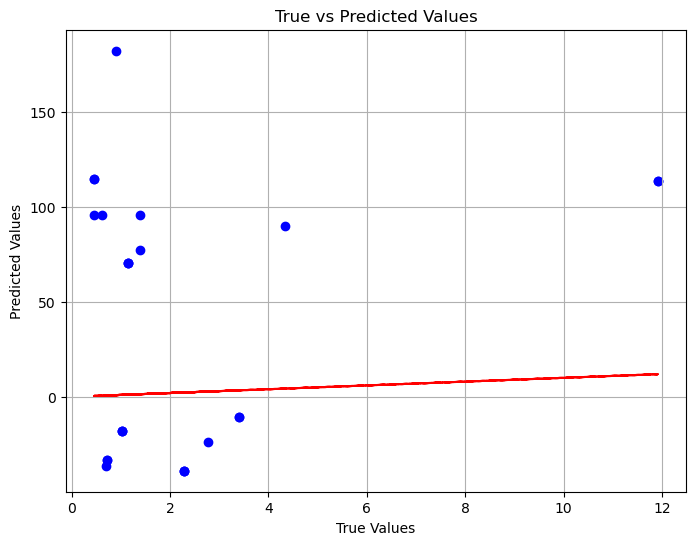

In [202]:
# Set hyperparameters
num_features = 17  # Adjust based on the number of features in your data
hidden_channels = 64
lr = 0.001
num_epochs = 100

# Construct the PyTorch Geometric Data object
data = Data(x=data.x, edge_index=edge_index, y=y)

# Call the function
train_and_evaluate(data, num_features, hidden_channels, lr, num_epochs)
